In [1]:
import numpy as np
import math
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.models import load_model
#from keras.models import load_model
from keras import backend as K
import os
import matplotlib.pyplot as plt

In [2]:
#Load model
ModelPath = "/home/ug-ml/Documents/GitHub_BigFiles/SaveFolder/Classifer_1_V1/Model.hdf5"

model = load_model(ModelPath)

model.summary()


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 48, 125, 125)      816       
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 48, 62, 62)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 48, 59, 59)        36912     
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 48, 29, 29)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 48, 26, 26)        36912     
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 48, 13, 13)        0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 8112)            

In [3]:
#Load data
def MakeThicknessList(ListPaths):
    Thickness = []
    for i in ListPaths:
        Thickness.append(int(i.split("/")[-1].split(".")[0]))
    Thickness = np.array(Thickness)
    return(Thickness)

def OpenTxt(Path):
    with open(Path) as textFile:
        lines = [line.split() for line in textFile]
    List = []
    for i in lines:
        List.append(i[0])
    return(List)

DataPath = "/home/ug-ml/felix-ML/classification/Classification000/DataPaths/"

TrainPath = OpenTxt(DataPath + "Train_0p1.txt")
ValPath = OpenTxt(DataPath + "Validation_0p1.txt")
TestPath = OpenTxt(DataPath + "Test_0p1.txt")

TrainThickness = MakeThicknessList(TrainPath)
ValThickness = MakeThicknessList(ValPath)
TestThickness = MakeThicknessList(TestPath)


TrainThickness_cat = to_categorical(TrainThickness)
ValThickness_cat = to_categorical(ValThickness)
TestThickness_cat = to_categorical(TestThickness)

AllPaths = [[TrainPath,TrainThickness],[ValPath,ValThickness],[TestPath,TestThickness]]

In [4]:
#Predict data

'''
for i in range(0, validationsize):
    



'''
def AverageLayer(LayerOutput):
    sum = 0
    for i in range(0, len(LayerOutput)):
        sum += i * LayerOutput[i]
    return(sum)

def PredictData(Paths, batchsize = 1, NoBeams = 1):
    Predicted = np.zeros(len(Paths), dtype = np.int)
    NoBatches = math.floor(len(Paths) / batchsize)
    
    
    BatchImage = np.zeros(batchsize * NoBeams * 128 * 128, dtype = np.float32).reshape(batchsize, NoBeams, 128, 128)
    NoLastBatch = len(Paths) - (NoBatches * batchsize)

    
    LastBatch = np.zeros(NoLastBatch * NoBeams * 128 * 128, dtype = np.float32).reshape(NoLastBatch, NoBeams, 128, 128) 
    print(NoBatches)
    
    if(batchsize != 1):
        for i in range(0, NoBatches + 1):
            print(i)
            if(i == NoBatches and NoLastBatch != 0):
                for j in range(0, NoLastBatch):
                    LastBatch[j] = np.load(Paths[i * batchsize + j])
                PredictedBatch = model.predict_classes(LastBatch, batch_size=NoLastBatch)
                Predicted[i * batchsize :] = PredictedBatch
            elif(i != NoBatches):
                for j in range(0, batchsize):
                    BatchImage[j] = np.load(Paths[i * batchsize + j])
                PredictedBatch = model.predict_classes(BatchImage, batch_size=batchsize)
                Predicted[i * batchsize : (i + 1) * batchsize] = PredictedBatch
        return(Predicted)
    else:
        Input = np.zeros(1 * NoBeams * 128 * 128, dtype=np.float32).reshape(1, NoBeams, 128, 128)
        OutputAverage = np.zeros(len(Paths), dtype = np.float32).reshape(len(Paths))
        Outputs = np.zeros(len(Paths), dtype=np.float32)
        for i in range(0, len(Paths)):
            print(i)
            for layer in model.layers:
                Input[0] = np.load(Paths[i])
                keras_function = K.function([model.input], [layer.output])

                A = keras_function([Input, 1])
                if(layer == model.layers[-1]):
                    Outputs = A[0][0]
                    
                    

            OutputAverage[i] = AverageLayer(Outputs)
            Predicted[i] = np.argmax(Outputs)
            
        return(Predicted, OutputAverage)

Predicted_train = PredictData(TrainPath, 1000, 1)
Predicted_val, OutputAverage_val = PredictData(ValPath, 1, 1)
Predicted_test, OutputAverage_test = PredictData(TestPath, 1, 1)

56
0
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
6651
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151

1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923


3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562


5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202


6644
6645
6646
6647
6648
6649
6650
3339
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
26

1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054


In [5]:
def CreateConfusionM(PredictedClass, CorrectClass, ClassRange):
    NumberImages = np.shape(PredictedClass)[0]
    NumberClass = ClassRange[1] - ClassRange[0] + 1
    
    AccuracyClass = np.zeros(NumberClass, dtype = np.float).reshape(NumberClass) # [[Num correct]]
    
    ConfusionM = np.zeros(NumberClass * NumberClass, dtype = np.float).reshape(NumberClass, NumberClass)
    
    for i in range(0, NumberImages):
        #print("Predicted and Correct are: ", PredictedClass, CorrectClass)
        if(PredictedClass[i] == CorrectClass[i]):
            AccuracyClass[CorrectClass[i] - ClassRange[0]]+=1
        
        ConfusionM[CorrectClass[i] - ClassRange[0]][PredictedClass[i] - ClassRange[0]] += 1
    
    AccuracyClass = AccuracyClass / (NumberImages / NumberClass)
    
    ConfusionM = ConfusionM / (NumberImages / NumberClass)
    return(AccuracyClass, ConfusionM)
        
def AverageOutputAccuracy(PredictedAverage, CorrectClass, ClassRange):
    Difference = PredictedAverage - CorrectClass
    
    correct = 0
    for i in Difference:
        if(i >= -0.5 and i <= 0.5):
            correct+=1
    
    print("Accuracy:", 100 * correct / len(Difference))
    mean = np.mean(Difference)
    rms = (np.sum(np.square(Difference)) / len(CorrectClass)) ** 0.5
    return(mean, rms)
    
    
    
AccuracyClass_train, ConfusionM_train = CreateConfusionM(TrainThickness, Predicted_train, [1,9])
AccuracyClass_val, ConfusionM_val = CreateConfusionM(ValThickness, Predicted_val, [1,9])
AccuracyClass_test, ConfusionM_test = CreateConfusionM(TestThickness, Predicted_test, [1,9])

mean_dif_val, rms_dif_val = AverageOutputAccuracy(ValThickness, OutputAverage_val, [1,9])
mean_dif_test, rms_dif_test = AverageOutputAccuracy(TestThickness, OutputAverage_test, [1,9])

print(mean_dif_test, rms_dif_test)
print("Standard deviation of diff test", np.std(TestThickness - OutputAverage_test))

Accuracy: 73.41753119831604
Accuracy: 71.45852051512429
0.008370776560607161 1.0321820027071307
Standard deviation of diff test 1.0321480595400425


In [ ]:
print("Train class predictions: ", AccuracyClass_train, np.mean(AccuracyClass_train))

fig=plt.figure(figsize = (9, 9))
img = ConfusionM_train
plt.imshow(img, cmap = "gray")          
plt.legend()
plt.show()

print("Val class predictions: ", AccuracyClass_val, np.mean(AccuracyClass_val))
print("mean and rms is :", mean_dif_val, rms_dif_val)

fig=plt.figure(figsize = (9, 9))
img = ConfusionM_val
plt.imshow(img, cmap = "gray")          
plt.legend()
plt.show()

print("Test class predictions: ", AccuracyClass_test, np.mean(AccuracyClass_test))
print("mean and rms is :", mean_dif_test, rms_dif_test)

fig=plt.figure(figsize = (9, 9))
img = ConfusionM_test
plt.imshow(img, cmap = "gray")          
plt.legend()
plt.show()


#Save Confusion Matrix
CM_path = "/home/ug-ml/tmp_git/FelixML_New/data_analysis/classification/Graphs/Confusion_Matrix/"
np.savetxt(CM_path + "CNN_ConfusionM_test_rms", ConfusionM_test)

In [8]:
def FindBin(Value, min_val, max_val, NoBins):
    
    index = math.floor(((round(Value) - round(min_val)) / (round(max_val) - round(min_val))) * NoBins)
    
    if index == NoBins:
        index = NoBins - 1

    return index

def BinLoss(OutputAverage, Thickness):
    Diff = OutputAverage - Thickness
    min_val = int(round(min(Diff)))
    max_val = int(round(max(Diff)))
    
    print(min_val, max_val)
    
    NoBins = max_val - min_val
    
    bin_size = (max_val - min_val) / NoBins
    
    Bin_Vals = ((np.arange(NoBins, dtype = np.float32) / NoBins)) * (max_val - min_val) + min_val
    
    Bin_Num = np.zeros(NoBins, dtype = np.int)
    
    for i in range(0, len(Diff)):
        index = FindBin(Diff[i], min_val, max_val, NoBins)
        Bin_Num[index]+=1
    
    return(Bin_Num, Bin_Vals)

Bin_Num_val, Bin_Vals_val = BinLoss(OutputAverage_val, ValThickness)
Bin_Num_test, Bin_Vals_test = BinLoss(OutputAverage_test, TestThickness)



-7 6
-7 6


[-7.0000000e+00 -6.0000000e+00 -5.0000000e+00 -4.0000000e+00
 -3.0000000e+00 -2.0000000e+00 -1.0000000e+00  4.7683716e-07
  1.0000000e+00  2.0000000e+00  3.0000000e+00  4.0000000e+00
  5.0000000e+00]


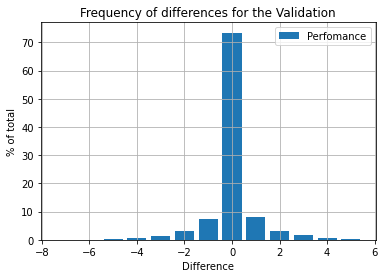

[-7.0000000e+00 -6.0000000e+00 -5.0000000e+00 -4.0000000e+00
 -3.0000000e+00 -2.0000000e+00 -1.0000000e+00  4.7683716e-07
  1.0000000e+00  2.0000000e+00  3.0000000e+00  4.0000000e+00
  5.0000000e+00]


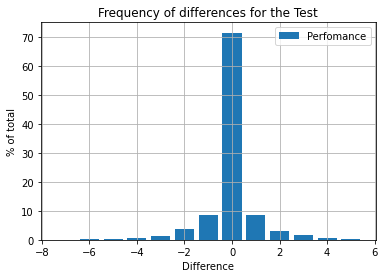

In [15]:
Accuracy_val = np.array(100 * Bin_Num_val / len(ValThickness))
plt.bar(Bin_Vals_val, Accuracy_val, label = "Perfomance")
print(Bin_Vals_val)
plt.xlabel('Difference')

plt.ylabel('% of total')
plt.title('Frequency of differences for the Validation')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()


Accuracy_test = np.array(100 * Bin_Num_test / len(TestThickness))
plt.bar(Bin_Vals_test, Accuracy_test, label = "Perfomance")
print(Bin_Vals_test)
plt.xlabel('Difference')

plt.ylabel('% of total')
plt.title('Frequency of differences for the Test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()


#Save Bin difference
BinDiff_path = "/home/ug-ml/tmp_git/FelixML_New/data_analysis/classification/Graphs/Bin_Difference/"
np.savetxt(BinDiff_path + "CNN_Bin_Value_test_x_rms", Bin_Vals_test)
np.savetxt(BinDiff_path + "CNN_Accuracy_test_y_rms", Accuracy_test)

In [10]:
def WhichCifs(Paths):
    CifBasePath = Paths[0].split("Data")[0] + "CifFolder/"
    CifPaths = []
    for i in range(0, int(len(Paths) / 9)):
        crystal_i = int(Paths[i * 9].split("/")[-2])
        CifPaths.append(CifBasePath + str(crystal_i) + ".cif")
    
    return(CifPaths)

    

def LoadAllCif(Path):
    CifInfo = []
    for i in Path:
        with open(i) as textFile:
            lines = [line.split() for line in textFile]

        for j in lines:
            for k in range(0, len(j)):
                if(j[k] == "_cell_length_a"):
                    lattice_a = float(j[k + 1].split("(")[0])
                    print(lattice_a)
                
                if(j[k] == "_symmetry_Int_Tables_number"):
                    spacegroup = j[k+1]
                    print(spacegroup)
                    print("")
                    CifInfo.append([lattice_a, spacegroup])
                    break
    return(CifInfo)

def IsInList(List, Value):
    if(len(List) == 0):
        return(False)
    else:
        for i in List:
            if(i == Value):
                return True
    return False

def ArgInList(List, Value):
    for i in range(0, len(List)):
        if(List[i] == Value):
            return(i)
    return(None)


def SpaceGroupInfo(CifInfo):
    ListSpaceGroup = []
    for i in CifInfo:
        spacegroup = i[1]
        if(IsInList(ListSpaceGroup, spacegroup) == False):
            ListSpaceGroup.append(spacegroup)
    ListSpaceGroup = sorted(ListSpaceGroup)
    NumberSpaceGroup = len(ListSpaceGroup)
    HistSpaceGroup = np.zeros(NumberSpaceGroup, dtype = np.int)
    
    for i in CifInfo:
        spacegroup = i[1]
        arg = 0
        for j in range(0, NumberSpaceGroup):
            if(ListSpaceGroup[j] == spacegroup):
                arg = j
                break
        HistSpaceGroup[j]+=1
        
    
    return(ListSpaceGroup, HistSpaceGroup)

def LatticeSizeInfo(CifInfo):
    minsize = np.inf
    maxsize = -np.inf
    for i in CifInfo:
        if(i[0] < minsize):
            minsize = i[0]
        elif(i[0] > maxsize):
            maxsize = i[0]
            
    NumberLattice = int(np.floor(maxsize) - np.floor(minsize) + 1)
    LatticeHist = np.zeros(NumberLattice, dtype = np.int)
    for i in CifInfo:
        index = int(np.floor(i[0]) - np.floor(minsize))
        LatticeHist[index]+=1
    
    return([minsize, maxsize], LatticeHist)


CifPaths_test = WhichCifs(TestPath)
CifInfo_test = LoadAllCif(CifPaths_test)

ListSpaceGroup_test, HistSpaceGroup_test = SpaceGroupInfo(CifInfo_test)
LatticeRange_test, LatticeHist_test = LatticeSizeInfo(CifInfo_test)


CifPaths_val = WhichCifs(ValPath)
CifInfo_val = LoadAllCif(CifPaths_val)

ListSpaceGroup_val, HistSpaceGroup_val = SpaceGroupInfo(CifInfo_val)
LatticeRange_val, LatticeHist_val = LatticeSizeInfo(CifInfo_val)

7.656
204

7.43
204

9.606
204

7.9743
204

7.738
204

10.2501
197

7.3727
204

11.79
204

10.0194
204

9.0713
204

7.2228
204

7.7112
204

7.428
204

9.136
204

9.142
204

10.217
197

14.096
204

9.3887
204

7.3877
204

8.08
204

7.33892
204

7.40704
204

7.2749
204

7.36636
204

8.098
204

15.3982
204

13.319
197

9.06361
204

7.3925
204

9.1036
204

15.33
204

8.173
205

11.3
205

12.4
205

5.788
205

12.492
205

12.322
205

5.6765
205

8.6311
205

8.7987
205

14.2502
205

12.393
205

12.328
205

10.22
205

15.65
205

7.944
205

14.095
205

9.1022
205

12.585
205

13.1075
205

13.234
205

12.3738
205

10.5685
205

6.074419
205

9.4146
206

6.64
206

9.85
206

10.927
206

10.809
206

13.069
197

10.682
206

10.628
206

10.597
206

10.448
206

10.4345
206

10.606
206

10.7716
206

10.6965
206

9.324
206

9.27
206

10.13
206

10.88126
206

10.9295
206

10.8906
206

10.6452
206

10.82601
206

6.363
198

10.3637
206

9.5565
206

8.3687
212

8.3339
212

4.674
198

8.1733
212

6.3
213

11.

9.628
220

8.72
220

9.383
220

9.48
220

8.088
220

10.6322
220

11.9794
220

10.2114
220

12.0285
220

14.5399
220

10.3548
220

12.2158
220

13.73
220

8.8091
199

8.3043
220

8.6763
199

10.749
220

10.2734
220

7.7212
220

3.383
221

12.259
221

3.91745
221

12.087
221

12.143
221

12.263
221

4.098
221

12.301
221

12.281
221

12.291
221

4.219
221

4.039
221

3.93613
221

3.9768
221

3.98524
221

3.82458
221

4.23452
221

4.109
221

4.7694
221

12.297
221

12.243
221

12.311
221

12.241
221

12.1
221

8.3441
221

8.3296
221

3.854
221

12.271
221

3.9651
221

8.3826
221

3.8897
221

12.204
221

12.187
221

5.501
221

4.035
221

3.8491
221

4.2364
221

4.44467
221

12.68
200

12.253
221

12.312
200

4.1138
221

8.2005
221

5.912
221

12.249
221

4.3033
221

4.0097
221

4.7748
221

5.205
221

8.311
200

4.27889
221

4.27959
221

6.128
221

3.9312
221

3.9027
221

4.29692
221

4.1549
221

4.007
225

8.09485
200

6.164
223

10.19
223

8.0767
200

10.422
223

8.0767
200

9.705
223

5

In [11]:
#print(LatticeHist_test)
#print(LatticeRange_test)

def BinLattice(OutputAverage, Thickness, LatticeRange, LatticeHist, CifInfo):
    Diff = OutputAverage - Thickness
    LatticeHist = LatticeHist * 9
    
    
    min_lattice = math.floor(LatticeRange[0])
    max_lattice = math.floor(LatticeRange[1])
    
    NoBins = max_lattice - min_lattice + 1
    
    bin_size = (max_lattice - min_lattice) / NoBins
    Bin_values = ((np.arange(NoBins, dtype = np.float32) / (NoBins - 1))) * (max_lattice - min_lattice) + min_lattice
    
    Bin_Diff = np.zeros(NoBins, dtype = np.float32)
    Bin_Acc = np.zeros(NoBins, dtype = np.float32)
    
    for i in range(0, len(Diff)):
        cif_i = math.floor(i / 9)
        index = int(np.floor(CifInfo[cif_i][0]) - min_lattice)
        
        Bin_Acc[index]+=Diff[i] ** 2
        
        
        Bin_Diff[index]+=Diff[i]
    
    for i in range(0, NoBins):
        Bin_Diff[i] = Bin_Diff[i] / LatticeHist[i]
        Bin_Acc[i] = (Bin_Acc[i] / LatticeHist[i]) ** 0.5
    
    return(Bin_Diff, Bin_Acc, Bin_values)

BinLattice_Diff_val, BinLattice_Acc_val, BinLattice_values_val = BinLattice(Predicted_val, ValThickness, LatticeRange_val, LatticeHist_val, CifInfo_val)
BinLattice_Diff_test, BinLattice_Acc_test, BinLattice_values_test = BinLattice(Predicted_test, TestThickness, LatticeRange_test, LatticeHist_test, CifInfo_test)


[ 24  36  39  31  59 114  95 145  59  80  23  20  14]


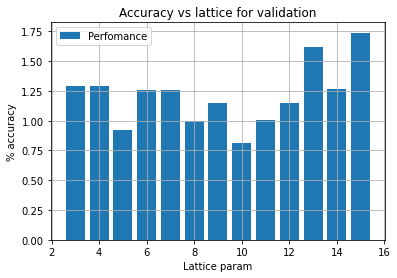

[ 24  36  39  31  59 114  95 145  59  80  23  20  14]


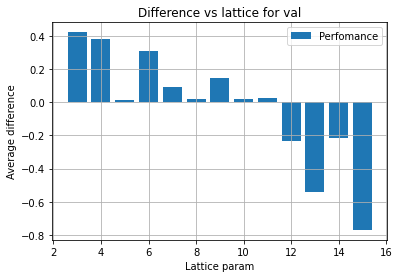

[ 7 16 19 31 32 53 45 67 32 39 13 12  5]


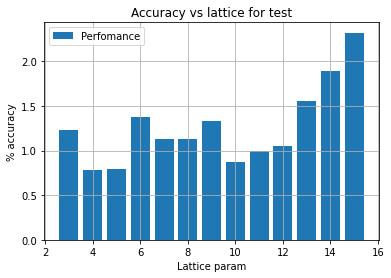

[ 7 16 19 31 32 53 45 67 32 39 13 12  5]


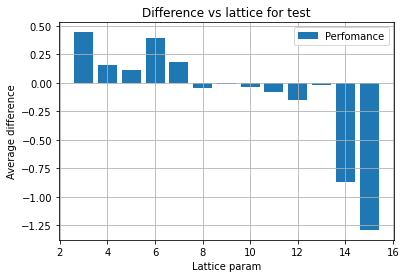

In [16]:
plt.bar(BinLattice_values_val, BinLattice_Acc_val, label = "Perfomance")
print(LatticeHist_val)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for validation')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(BinLattice_values_val, BinLattice_Diff_val, label = "Perfomance")
print(LatticeHist_val)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for val')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()





plt.bar(BinLattice_values_test, BinLattice_Acc_test, label = "Perfomance")
print(LatticeHist_test)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(BinLattice_values_test, BinLattice_Diff_test, label = "Perfomance")
print(LatticeHist_test)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()




#Save Bin Lattice
BinLattice_path = "/home/ug-ml/tmp_git/FelixML_New/data_analysis/classification/Graphs/Bin_Lattice/"
np.savetxt(BinLattice_path + "CNN_Bin_Lattice_test_x_rms", BinLattice_values_test)
np.savetxt(BinLattice_path + "CNN_Acc_test_y1_rms", BinLattice_Acc_test)

np.savetxt(BinLattice_path + "CNN_Diff_test_y2_rms", BinLattice_Diff_test)

In [13]:
def BinSpaceGroup(OutputAverage, Thickness, ListSpaceGroup, HistSpaceGroup, CifInfo):
    Diff = OutputAverage - Thickness
    HistSpaceGroup = HistSpaceGroup * 9
    
    NoBins = len(ListSpaceGroup)
    
    Bin_Diff = np.zeros(NoBins, dtype = np.float32)
    Bin_Acc = np.zeros(NoBins, dtype = np.float32)
    

    for i in range(0, len(Diff)):
        cif_i = math.floor(i / 9)
        index = ArgInList(ListSpaceGroup, CifInfo[cif_i][1])
        
        Bin_Acc[index]+=Diff[i] ** 2
        
        Bin_Diff[index]+=Diff[i]
    
    
    
    for i in range(0, NoBins):
        Bin_Diff[i] = Bin_Diff[i] / HistSpaceGroup[i]
        Bin_Acc[i] = (Bin_Acc[i] / HistSpaceGroup[i]) ** 0.5
        
    
    
    return(Bin_Diff, Bin_Acc)

BinSG_Diff_val, BinSG_Acc_val = BinSpaceGroup(Predicted_val, ValThickness, ListSpaceGroup_val, HistSpaceGroup_val, CifInfo_val)
BinSG_Diff_test, BinSG_Acc_test = BinSpaceGroup(Predicted_test, TestThickness, ListSpaceGroup_test, HistSpaceGroup_test, CifInfo_test)

[12 20 15 15 17  1 55 44 44 17 18 23 30 50 38 48 54 49 13 37 15 33 44 47]


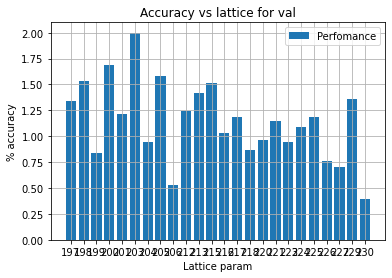

[12 20 15 15 17  1 55 44 44 17 18 23 30 50 38 48 54 49 13 37 15 33 44 47]


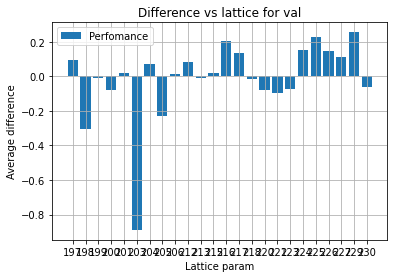

[ 6 15  2  9  6 28 23 23  3 13 12 19 30 26 19 22 20  2 23 10 21 17 22]


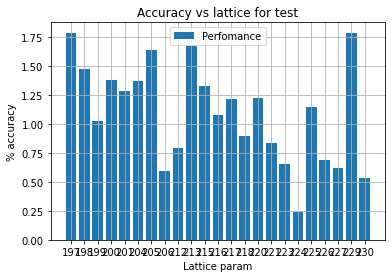

[ 6 15  2  9  6 28 23 23  3 13 12 19 30 26 19 22 20  2 23 10 21 17 22]


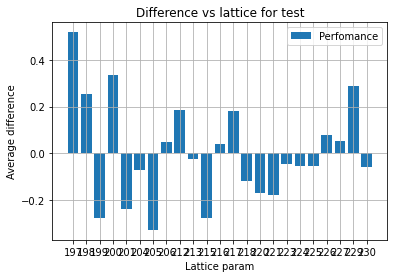

In [17]:
plt.bar(ListSpaceGroup_val, BinSG_Acc_val, label = "Perfomance")
print(HistSpaceGroup_val)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for val')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(ListSpaceGroup_val, BinSG_Diff_val, label = "Perfomance")
print(HistSpaceGroup_val)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for val')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()




plt.bar(ListSpaceGroup_test, BinSG_Acc_test, label = "Perfomance")
print(HistSpaceGroup_test)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(ListSpaceGroup_test, BinSG_Diff_test, label = "Perfomance")
print(HistSpaceGroup_test)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()


#Save Bin SpaceGroup
SpaceGroup_path = "/home/ug-ml/tmp_git/FelixML_New/data_analysis/classification/Graphs/Bin_SG/"
np.savetxt(SpaceGroup_path + "CNN_Bin_SG_test_x_rms", ListSpaceGroup_test, fmt='%s')
np.savetxt(SpaceGroup_path + "CNN_Acc_test_y1_rms", BinSG_Acc_test)

np.savetxt(SpaceGroup_path + "CNN_Diff_test_y2_rms", BinSG_Diff_test)

In [ ]:
#Save Data


